<a href="https://colab.research.google.com/github/Cairo-Henrique/Fundamentos-da-Programacao-de-Computadores-USP/blob/main/FPC_Lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 1


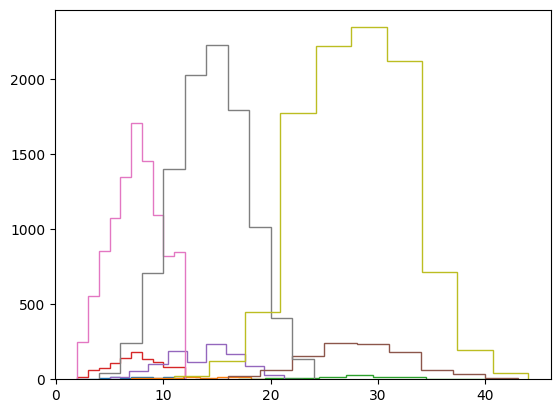

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Parâmetros
M = 2 # M dados
N = 10000 # dados N jogados vezes

def soma_M_dados(M):
  array_di = np.array([]) # cria array pra armazenar o valor de cada dado d_i
  for i in range(M):
    di = np.random.randint(1, 7)
    array_di = np.append(array_di, di)
  S = np.sum(array_di) # soma todos os d_i
  return S

def soma_M_dados_N_vezes(M, N):
  array_S = np.array([]) # cria array pra armazenar cada soma de M dados
  for vez in range(N): # N somas
    S = soma_M_dados(M)
    array_S = np.append(array_S, S)
  return array_S

# Histograma com valores do enunciado
for N in [10**2, 10**3, 10**4]:
  for M in [2, 4, 8]:
    counts, bins = np.histogram(soma_M_dados_N_vezes(M, N))
    plt.stairs(counts, bins)

Questão 2

   N = 10^3 N = 10^4 N = 10^5  N = 10^6
0     3.176   3.1488  3.13408  3.141332
1     3.096   3.1244  3.14992  3.138664
2     3.184   3.1392   3.1486  3.144116
3      3.14    3.144  3.14976  3.144172
4     3.164   3.1124   3.1428   3.14126
5     3.136   3.1304  3.13868  3.143632
6     3.144    3.156  3.14064  3.140828
7     3.036   3.1412  3.14184   3.13928
8     3.184   3.1572   3.1344   3.14186
9      3.14    3.132  3.14336   3.14242
10    3.144    3.156  3.14612  3.139324
11    3.188     3.14   3.1254  3.144348
12    3.196    3.134  3.12892  3.140792
13     3.18   3.1416  3.14312  3.143044
14    3.176   3.1468   3.1462  3.141476
15    3.128   3.1484  3.14116  3.140868
16    3.184   3.1652   3.1434  3.139292
17     3.14   3.1576  3.13988   3.14276
18    3.104   3.1316  3.14216  3.142416
19     3.22   3.1672   3.1464  3.140356
Médias de pi para cada coluna: [3.153 3.1437 3.141342 3.1416119999999994]


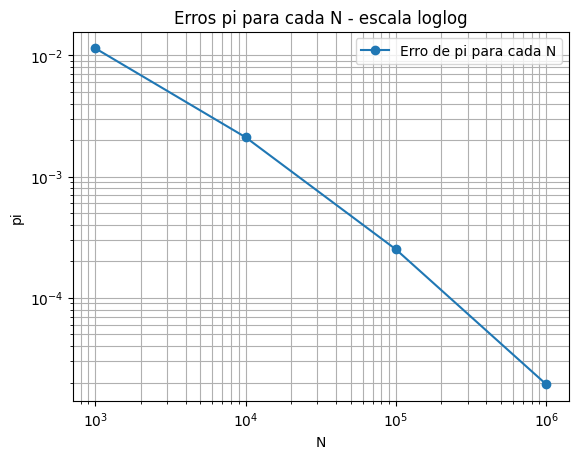

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # para a tabela

# Função que calcula pi por Monte Carlo em uma circunferência
def pi_monte_carlo(N):

  pontos_dentro = 0

  for i in range(N):
      x = np.random.rand(1)
      y = np.random.rand(1)
      if x**2 + y**2 <= 1: # pontos dentro da circunferência x² + y² = 1
          pontos_dentro += 1
  pi_MC = 4*pontos_dentro/N # pois usamos apenas 1 quadrante

  return pi_MC

potencias_10 = [10**3, 10**4, 10**5, 10**6]

# Tabela 4 colunas x p linhas
p = 20  # número de linhas
tabela = pd.DataFrame(index=range(p), columns=["N = 10^3", "N = 10^4", "N = 10^5", "N = 10^6"]) # nomeia as linhas e as colunas
for i in range(p):
  tabela.iloc[i] = [pi_monte_carlo(j) for j in potencias_10] # preenche cada linha com uma lista contendo valores de pi_monte_carlo(10**n)

print(tabela)

medias_pi = np.array(tabela.mean(axis=0)) # média da coluna usando numpy
print('Médias de pi para cada coluna:', medias_pi)

erros_pi = np.array([abs(np.pi - media_pi) for media_pi in medias_pi]) # valores do eixo vertical do gráfico

# Gráfico
plt.figure()
plt.loglog(potencias_10, erros_pi, marker="o", label="Erro de pi para cada N")
plt.xlabel("N")
plt.ylabel("pi")
plt.title("Erros pi para cada N - escala loglog")
plt.legend()
plt.grid(True, which="both")  # mostra grid em escala log
plt.show()

Questão 3

        N  pi_estimado      erro
0      10     2.904518  0.237074
1     100     3.120417  0.021176
2    1000     3.139555  0.002037
3   10000     3.141391  0.000201
4  100000     3.141573  0.000020


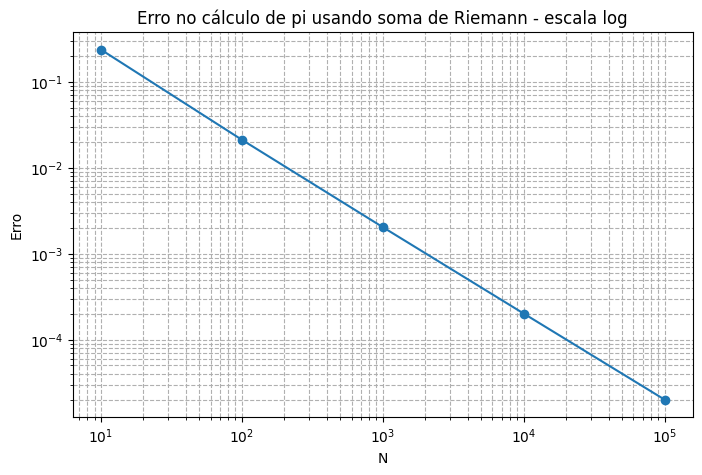

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# função f(x)
def f(x):
    return np.sqrt(1 - x**2)

# cálculo de pi via soma de Riemann
def calcula_pi(N):
    dx = 1.0 / N # diferencial dx
    xi = np.linspace(dx, 1, N) # pontos xi = i * dx
    SR = np.sum(f(xi) * dx) # soma de Riemann
    return 4 * SR

# testar para vários valores de N
lista_N = [10, 100, 1000, 10000, 100000]
lista_pi = []
erros = []

for N in lista_N:
    pi_est = calcula_pi(N)
    lista_pi.append(pi_est)
    erros.append(abs(np.pi - pi_est))

# tabela de resultados
import pandas as pd
tabela = pd.DataFrame({
    "N": lista_N,
    "pi_estimado": lista_pi,
    "erro": erros
})
print(tabela)

# plot erro vs N
plt.figure(figsize=(8,5))
plt.loglog(lista_N, erros, "o-")
plt.xlabel("N")
plt.ylabel("Erro")
plt.title("Erro no cálculo de pi usando soma de Riemann - escala log")
plt.grid(True, which="both", ls="--")
plt.show()

Questão 4

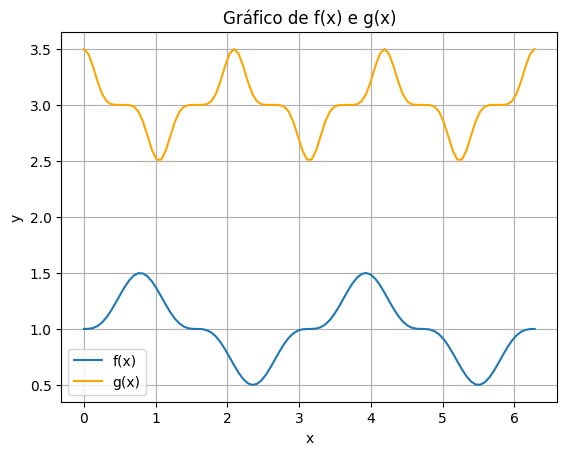

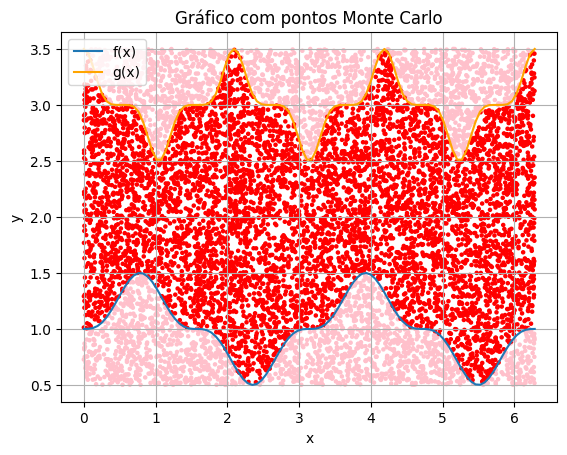

Área por Monte Carlo: 12.536839643415428
Área analítica: 12.566370614359172
Erro: 0.02953097094374435


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# funções do enunciado a seguir
def f(x):
  y = 1 + 0.5 * np.sin(2*x)**3
  return y

def g(x):
  y = 3 + 0.5 * np.cos(3*x)**5
  return y

x_f_g = np.linspace(0, 2*np.pi, 100) # array do eixo horizontal
y_f = f(x_f_g) # valores f(x) correspondentes
y_g = g(x_f_g) # valores g(x) correspondentes

# Gráfico de f(x) e g(x)
plt.figure()
plt.plot(x_f_g, y_f, label="f(x)")
plt.plot(x_f_g, y_g, label="g(x)", color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de f(x) e g(x)")
plt.legend()
plt.grid(True)
plt.show()

# A solução analítica da área entre essas duas curvas por integral é 4*pi

# Área por Monte Carlo
def area_monte_carlo(N):
  pontos_dentro = 0
  x = np.random.uniform(0, 2*np.pi, N)
  y = np.random.uniform(0.5, 3.5, N)
  for i in range(N):
    if y[i] >= f(x[i]) and y[i] <= g(x[i]): # (se o ponto está na área entre as duas funções)
      pontos_dentro += 1
  area_retangulo = 2*np.pi * (3.5 - 0.5) # área do retângulo que engloba tudo
  area_MC = (pontos_dentro/N)*area_retangulo # fração da área do retângulo que é a área de interesse
  return area_MC, x, y

area_MC, x, y = area_monte_carlo(10000)

# Gráfico com pontos Monte Carlo
plt.figure()

mask = (y >= f(x)) & (y <= g(x)) # condição para pontos dentro
colors = np.where(mask, 'red', 'pink') # vermelho dentro e rosa fora
plt.scatter(x, y, color=colors, s=5)

plt.plot(x_f_g, y_f, label="f(x)")
plt.plot(x_f_g, y_g, label="g(x)", color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico com pontos Monte Carlo")
plt.legend()
plt.grid(True)
plt.show()

print(f"Área por Monte Carlo: {area_MC}")
print(f"Área analítica: {4*np.pi}")
print(f"Erro: {abs(4*np.pi - area_MC)}")

Questão 5

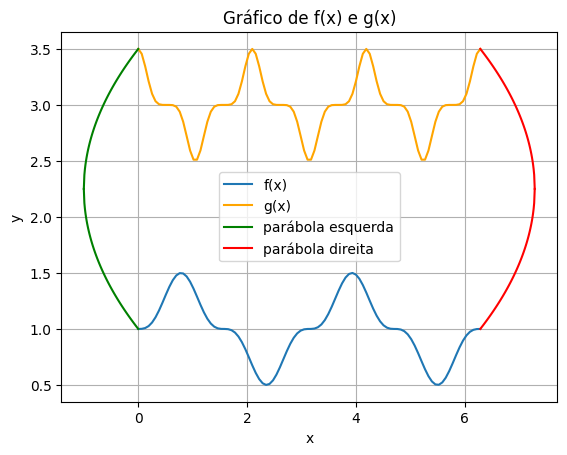

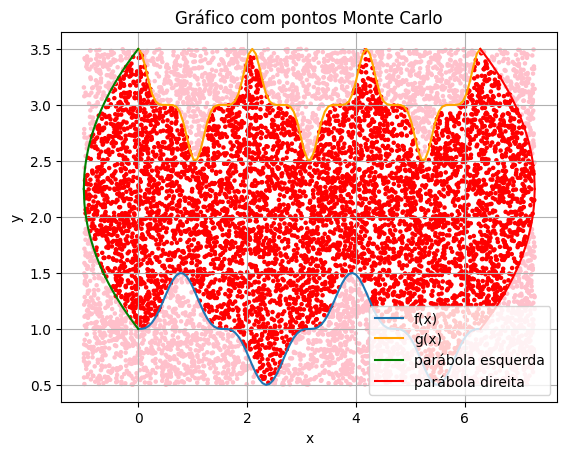

         Área Monte Carlo
N                        
1000            15.282477
10000           15.789408
100000          15.865447
1000000         15.892757


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# funções do enunciado a seguir
def f(x):
  y = 1 + 0.5 * np.sin(2*x)**3
  return y

def g(x):
  y = 3 + 0.5 * np.cos(3*x)**5
  return y

def parabola_esquerda(x):
  y = 1.25*np.sqrt(x+1) + 2.25 # Parte de cima, descoberta usando função quadrática inversa
  return y

def parabola_esquerda_invertida(x):
  y = (-1.25)*np.sqrt(x+1) + 2.25 # Parte de baixo, descoberta usando função quadrática inversa
  return y

def parabola_direita(x):
  y = 1.25*np.sqrt(-(x-(2*np.pi+1))) + 2.25 # Parte de cima, descoberta usando função quadrática inversa
  return y

def parabola_direita_invertida(x):
  y = (-1.25)*np.sqrt(-(x-(2*np.pi+1))) + 2.25 # Parte de baixo, descoberta usando função quadrática inversa
  return y

x_f_g = np.linspace(0, 2*np.pi, 100) # valores do eixo horizontal
y_f = f(x_f_g)
y_g = g(x_f_g)

x_parabola_esquerda = np.linspace(-1, 0, 100)
y_parabola_esquerda = parabola_esquerda(x_parabola_esquerda)

x_parabola_direita = np.linspace(2*np.pi, 2*np.pi+1, 100)
y_parabola_direita = parabola_direita(x_parabola_direita)

y_parabola_esquerda_invertida = parabola_esquerda_invertida(x_parabola_esquerda) # parte de baixo da parábola esquerda
y_parabola_direita_invertida = parabola_direita_invertida(x_parabola_direita) # parte de baixo da parábola direita

# Gráfico de f(x) e g(x) e parábolas
plt.figure()

plt.plot(x_f_g, y_f, label="f(x)")
plt.plot(x_f_g, y_g, label="g(x)", color='orange')
plt.plot(x_parabola_esquerda, y_parabola_esquerda, label="parábola esquerda", color='green')
plt.plot(x_parabola_esquerda, y_parabola_esquerda_invertida, color='green')
plt.plot(x_parabola_direita, y_parabola_direita, label="parábola direita", color='red')
plt.plot(x_parabola_direita, y_parabola_direita_invertida, color='red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de f(x) e g(x)")
plt.legend()
plt.grid(True)
plt.show()

# Área por Monte Carlo
def area_monte_carlo(N):
  pontos_dentro = 0
  x = np.random.uniform(-1, 2*np.pi+1, N)
  y = np.random.uniform(0.5, 3.5, N)
  for i in range(N):
    xi = x[i]
    yi = y[i]

    # só considerar a região f-g quando x está em [0, 2*pi]
    in_fg_domain = (xi >= 0) and (xi <= 2*np.pi)
    cond_fg = in_fg_domain and (yi >= f(xi)) and (yi <= g(xi))

    # região das parábolas
    in_left_domain = (xi >= -1) and (xi <= 0)
    cond_left = in_left_domain and (yi <= parabola_esquerda(xi)) and (yi >= parabola_esquerda_invertida(xi))

    in_right_domain = (xi >= 2*np.pi) and (xi <= 2*np.pi + 1)
    cond_right = in_right_domain and (yi <= parabola_direita(xi)) and (yi >= parabola_direita_invertida(xi))

    if cond_fg or cond_left or cond_right:
        pontos_dentro += 1

  area_retangulo = ((2*np.pi + 2) * (3.5 - 0.5))
  area_MC = (pontos_dentro/N)*area_retangulo
  return area_MC, x, y

area_MC, x, y = area_monte_carlo(10000)

# Gráfico com pontos Monte Carlo
plt.figure()

# só considerar a região f-g quando x está em [0, 2*pi]
in_fg_domain = (x >= 0) & (x <= 2*np.pi)
cond_fg = in_fg_domain & (y >= f(x)) & (y <= g(x))

# região das parábolas
in_left_domain = (x >= -1) & (x <= 0)
cond_left = in_left_domain & (y <= parabola_esquerda(x)) & (y >= parabola_esquerda_invertida(x))

in_right_domain = (x >= 2*np.pi) & (x <= 2*np.pi + 1)
cond_right = in_right_domain & (y <= parabola_direita(x)) & (y >= parabola_direita_invertida(x))

mask = cond_fg | cond_left | cond_right # condição para pontos dentro
colors = np.where(mask, 'red', 'pink') # vermelho dentro e rosa fora
plt.scatter(x, y, color=colors, s=5)

plt.plot(x_f_g, y_f, label="f(x)")
plt.plot(x_f_g, y_g, label="g(x)", color='orange')
plt.plot(x_parabola_esquerda, y_parabola_esquerda, label="parábola esquerda", color='green')
plt.plot(x_parabola_esquerda, y_parabola_esquerda_invertida, color='green')
plt.plot(x_parabola_direita, y_parabola_direita, label="parábola direita", color='red')
plt.plot(x_parabola_direita, y_parabola_direita_invertida, color='red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico com pontos Monte Carlo")
plt.legend()
plt.grid(True)
plt.show()

import pandas as pd

lista_N = [10**3, 10**4, 10**5, 10**6]  # números de pontos jogados
areas = []

# Criar lista de áreas
for N in lista_N:
    area_MC, x, y = area_monte_carlo(N)
    areas.append(area_MC)

tabela = pd.DataFrame(areas, columns=["Área Monte Carlo"], index=lista_N)
tabela.index.name = "N"
print(tabela)

Questão 6

  N = 10^3 N = 10^4 N = 10^5  N = 10^6
0    3.006   3.1134  3.15558  3.141672
1    2.988   3.1374  3.13374  3.140418
2    3.186   3.1626  3.14244   3.14061
Médias de pi para cada coluna: [3.06 3.1378 3.14392 3.1409000000000002]


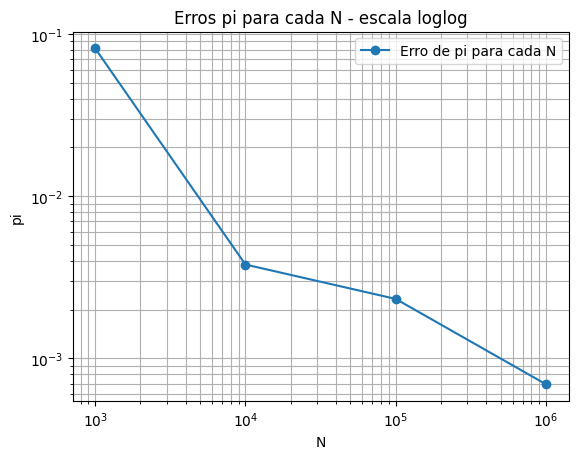

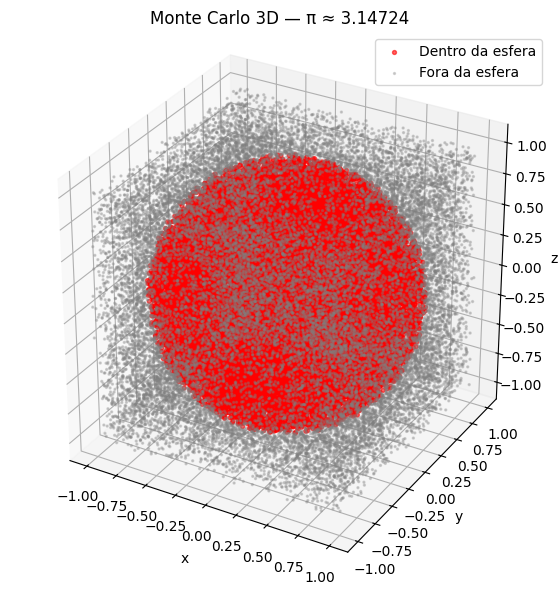

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Função que calcula pi por Monte Carlo em uma esfera
def pi_monte_carlo(N, retornar_pontos=False):
    pontos = np.random.uniform(-1.0, 1.0, size=(N, 3)) # gera N pontos em uma matriz (N, 3)
    mask = np.sum(pontos**2, axis=1) <= 1.0 # condição dos pontos dentro da esfera é pela soma dos quadrados de cada linha
    inside = pontos[mask] # pontos dentro
    outside = pontos[~mask] # pontos fora

    pi_est = 6.0 * inside.shape[0] / N # estimativa de pi usando números de elementos em inside

    if retornar_pontos:
        x_dentro, y_dentro, z_dentro = inside[:, 0], inside[:, 1], inside[:, 2] # pontos dentro
        x_fora, y_fora, z_fora = outside[:, 0], outside[:, 1], outside[:, 2] # pontos fora
        return pi_est, x_dentro, y_dentro, z_dentro, x_fora, y_fora, z_fora
    else:
        return pi_est

potencias_10 = [10**3, 10**4, 10**5, 10**6]

# Tabela 4 colunas x p linhas
p = 3  # número de linhas
tabela = pd.DataFrame(index=range(p), columns=["N = 10^3", "N = 10^4", "N = 10^5", "N = 10^6"])
for i in range(p):
  tabela.iloc[i] = [pi_monte_carlo(j) for j in potencias_10]

print(tabela)

medias_pi = np.array(tabela.mean(axis=0))
print('Médias de pi para cada coluna:', medias_pi)

erros_pi = np.array([abs(np.pi - media_pi) for media_pi in medias_pi])

# Gráfico
plt.figure()
plt.loglog(potencias_10, erros_pi, marker="o", label="Erro de pi para cada N")
plt.xlabel("N")
plt.ylabel("pi")
plt.title("Erros pi para cada N - escala loglog")
plt.legend()
plt.grid(True, which="both")  # mostra grid em escala log
plt.show()

# Parâmetros
N = 50000
pi_est, x_dentro, y_dentro, z_dentro, x_fora, y_fora, z_fora = pi_monte_carlo(N, retornar_pontos=True)

# Plot 3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Pontos dentro (mais visíveis)
ax.scatter(x_dentro, y_dentro, z_dentro, s=8, c='red', alpha=0.6, label="Dentro da esfera")

# Pontos fora (amostragem total - dentro)
ax.scatter(x_fora, y_fora, z_fora, s=2, c='grey', alpha=0.3, label="Fora da esfera")

# Labels do gráfico
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f"Monte Carlo 3D — π ≈ {pi_est:.5f}")

ax.set_box_aspect([1,1,1])

plt.legend()
plt.show()

Questão 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parâmetros
n = 2 # número de caras seguidas
N = 3 # número de lançamentos

def max_caras_seguidas(moedas, n): # função que checa se a array de moedas deu certo
  for i in range(N-n+1): # itera até não ter mais espaço para n lançamentos
    if moedas[i:i+n].sum() == n: # somando as caras 1 a 1 deve dar n, pois aparecem n vezes
      return True
  return False

# lançamento das moedas
moedas = np.random.randint(0, 2, size=N)
# 1 é cara
# 0 é coroa

# Probabilidade
experimentos = 10000
for N in [10, 20]:
  for n in [3, 5]:
    print(f'\nN = {N} e n = {n}:')
    casos_de_sucesso = 0
    for i in range(experimentos):
      moedas = np.random.randint(0, 2, size=N) # lança a moeda N vezes
      if max_caras_seguidas(moedas, n): # conta um caso de sucesso se retornar true pra n caras seguidas
        casos_de_sucesso += 1
    print(f'Probabilidade: {casos_de_sucesso/experimentos}')


N = 10 e n = 3:
Probabilidade: 0.5127

N = 10 e n = 5:
Probabilidade: 0.1097

N = 20 e n = 3:
Probabilidade: 0.7843

N = 20 e n = 5:
Probabilidade: 0.2504


Questão 8

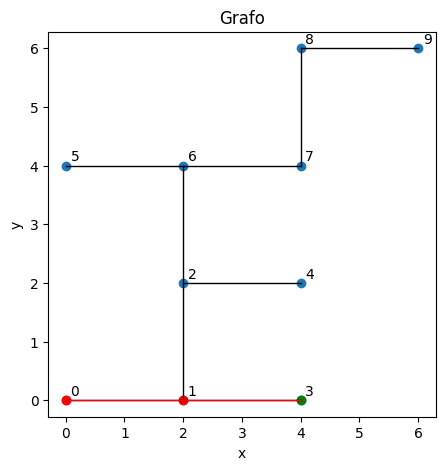

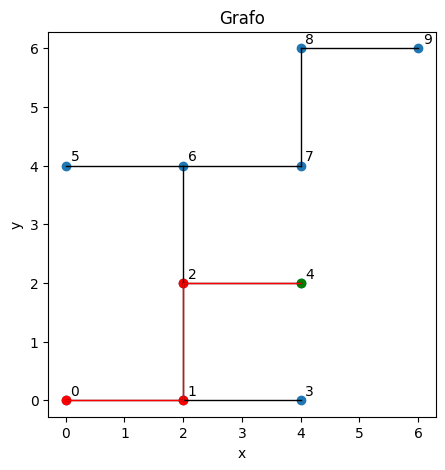

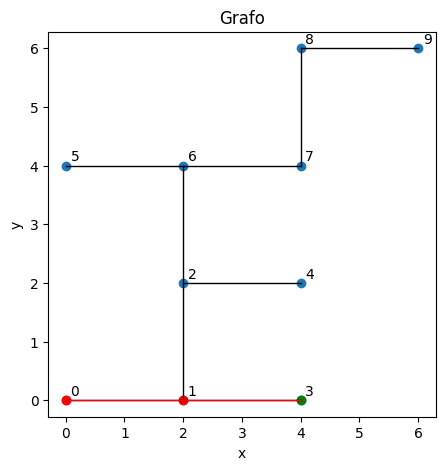

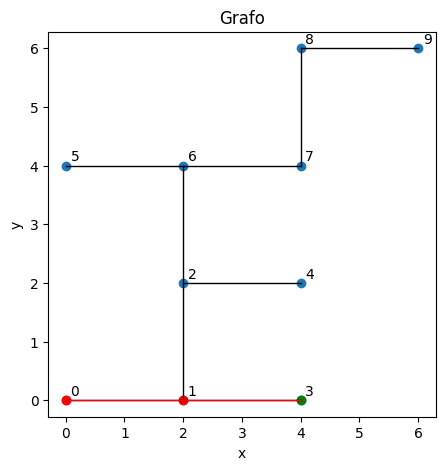

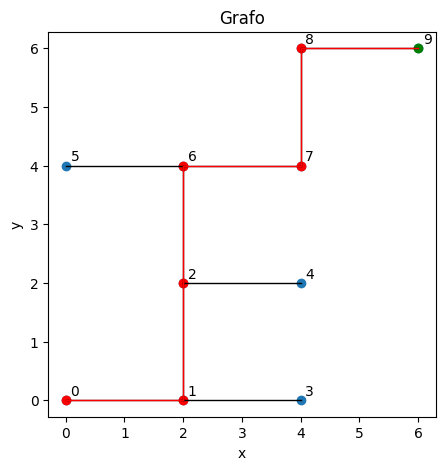

Probabilidade: 0.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice # Para escolher um nó aleatório

################################################################################

# coordenadas dos nós
coords = np.array([
    [0.0, 0.0],  # nó 0
    [2.0, 0.0],  # nó 1
    [2.0, 2.0],  # nó 2
    [4.0, 0.0],  # nó 3
    [4.0, 2.0],  # nó 4
    [0.0, 4.0],  # nó 5
    [2.0, 4.0],  # nó 6
    [4.0, 4.0],  # nó 7
    [4.0, 6.0],  # nó 8
    [6.0, 6.0]   # nó 9
])

edges = [
    (0, 1), (1, 3), (1, 2), (2, 4), (2, 6), (6, 5), (6, 7), (7, 8), (8, 9)
]

# Criar matriz de adjacência (NxN)
N = len(coords)
A = np.zeros((N, N))
for i,j in edges:
    A[i,j] = 1
    A[j,i] = 1 # A = A^T

# Partícula
N = len(coords) # N nós
M = 5 # M experimentos

################################################################################

def grafico_base(): # cria o gráfico base para o caminho
  plt.figure(figsize=(5,5))
  # desenha arestas
  for i in range(N): # para cada nó i
      for j in range(i+1, N): # para cada nó j após i. Isso evita repetição de arestas
          if A[i,j] == 1:
              xi, yi = coords[i] # coordenadas nó i
              xj, yj = coords[j] # coordenadas nó j
              plt.plot([xi, xj], [yi, yj], linewidth=1, color='black') # conecta i e j por plot()

  # desenha nós e rótulos
  valores_x = [i[0] for i in coords]
  valores_y = [i[1] for i in coords]
  plt.scatter(valores_x, valores_y)
  for k,(x,y) in enumerate(coords):
      plt.text(x+0.08, y+0.08, str(k), fontsize=10)

  plt.title("Grafo")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.axis("equal")
  plt.grid(False)

  return True

def posicao_apos_passo(no_atual, nos_ja_visitados): # função que retorna o próximo passo do caminho
  nos_disponiveis = [i for i in range(N) if A[no_atual, i] == 1] # lista com nós disponíveis usando a matriz A se o valor for 1
  for no in nos_ja_visitados: # Remove nós já visitados
      if no in nos_disponiveis:
          nos_disponiveis.remove(no)
  if nos_disponiveis == []:
    return no_atual # se não houver nós disponíveis, retorna o nó atual
  no_escolhido = choice(nos_disponiveis) # nó escolhido aleatoriamente
  return no_escolhido

def ultimo_no_apos_caminho(): # faz o caminho usando a função passo, plota o gráfico e retorna o último nó
  posicao = 0 # inicia no nó 0
  nos_ja_visitados = [posicao] # o primeiro nó visitado é o primeiro nó (0)
  while True: # caminho
    posicao = posicao_apos_passo(posicao, nos_ja_visitados)
    if posicao in nos_ja_visitados:
      break # se o nó atual já tiver sido visitado, acabou
    nos_ja_visitados.append(posicao)

  grafico_base()

  # desenha o caminho usando plt.plot sobre cada par de nós visitados i e i+1
  for i in range(len(nos_ja_visitados)-1):
      xi, yi = coords[nos_ja_visitados[i]] # nó i
      xj, yj = coords[nos_ja_visitados[i+1]] # nó i+1
      plt.plot([xi, xj], [yi, yj], linewidth=1, color='red') # desenha o caminho feito entre eles
      plt.scatter(xi, yi, color='red')

  # Último nó
  ultimo_no = nos_ja_visitados[-1]
  x_ultimo, y_ultimo = coords[ultimo_no]
  plt.scatter(x_ultimo, y_ultimo, color='green') # plota o último ponto em verde

  plt.show()

  return ultimo_no

# M iteracoes
experimentos_favoraveis = 0
for experimento in range(M): # M experimentos
  ultimo_no = ultimo_no_apos_caminho()
  if ultimo_no == N-1:
    experimentos_favoraveis += 1 # se o último nó for o 9, conta um caso favorável

print(f'Probabilidade: {experimentos_favoraveis/M}')

Questão 8 - Parte 2

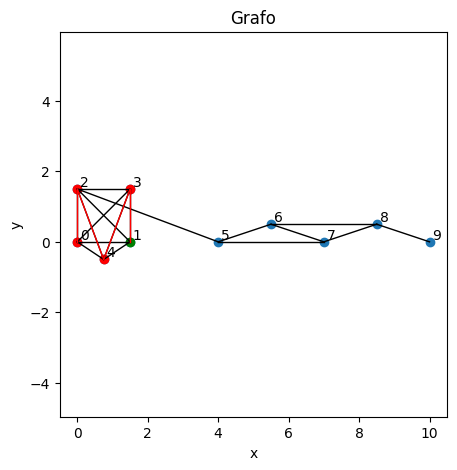

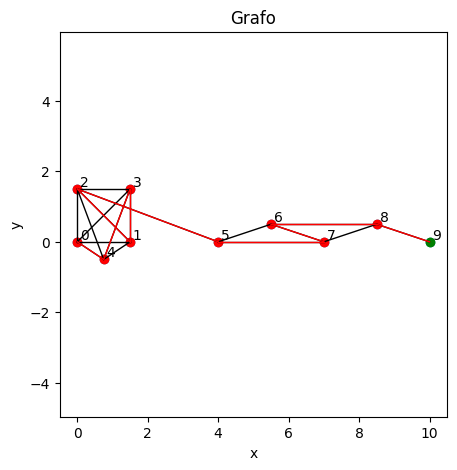

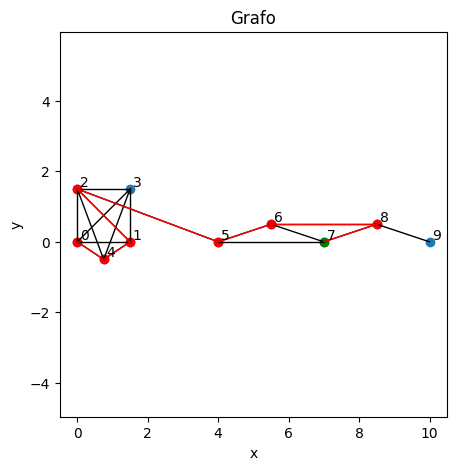

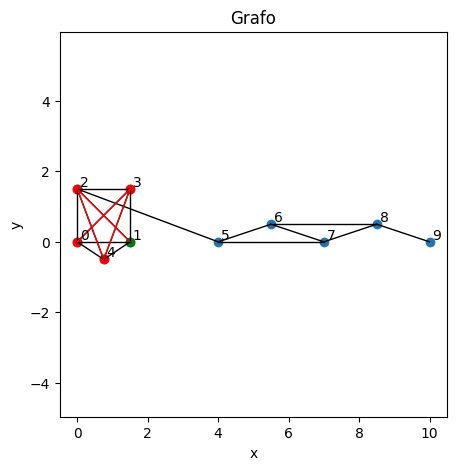

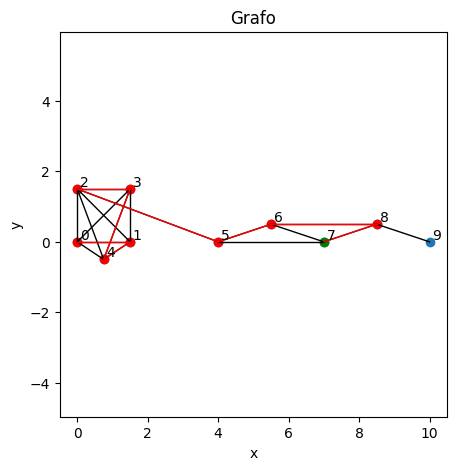

Probabilidade: 0.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice # Para escolher um nó aleatório

################################################################################

# coordenadas dos nós
coords = np.array([
    [0.0, 0.0],    # nó 0
    [1.5, 0.0],    # nó 1
    [0.0, 1.5],    # nó 2 (ponte que conecta ao 5)
    [1.5, 1.5],    # nó 3
    [0.75, -0.5],  # nó 4
    [4.0, 0.0],    # nó 5
    [5.5, 0.5],    # nó 6
    [7.0, 0.0],    # nó 7
    [8.5, 0.5],    # nó 8
    [10.0, 0.0]    # nó 9
])

edges = [
 (0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),
 (5,6),(6,7),(7,8),(8,9),(5,7),(6,8),
 (2,5)
]

# Criar matriz de adjacência (NxN)
N = len(coords)
A = np.zeros((N, N))
for i,j in edges:
    A[i,j] = 1
    A[j,i] = 1 # A = A^T

# Partícula
N = len(coords) # N nós
M = 5 # M experimentos

################################################################################

# M iteracoes
experimentos_favoraveis = 0
for experimento in range(M):
  ultimo_no = ultimo_no_apos_caminho()
  #print(ultimo_no)
  if ultimo_no == N-1:
    experimentos_favoraveis += 1

print(f'Probabilidade: {experimentos_favoraveis/M}')

Questão 8 - Parte 3

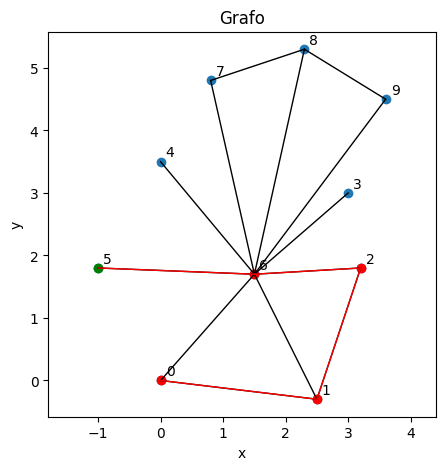

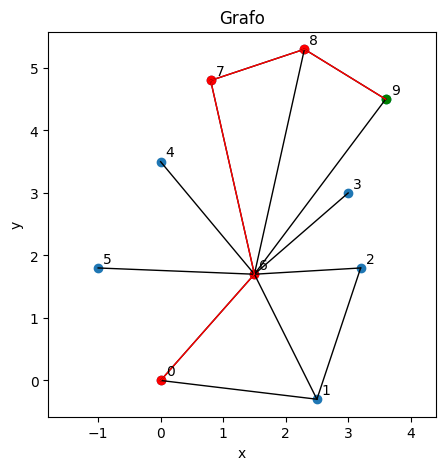

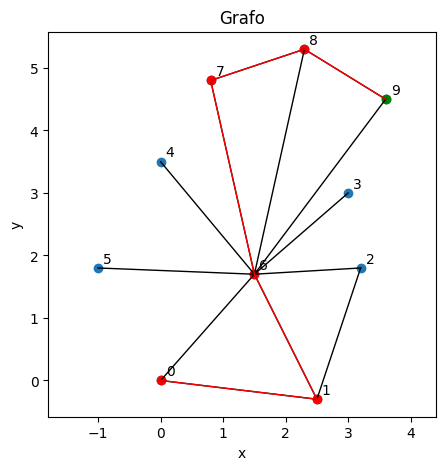

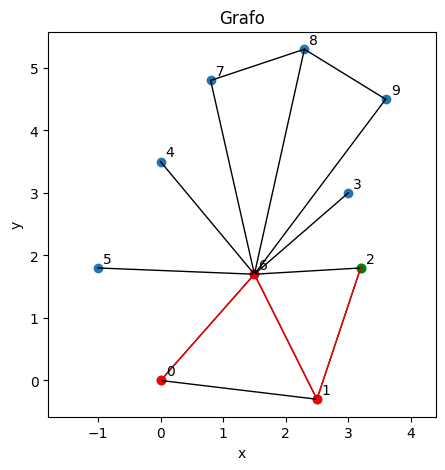

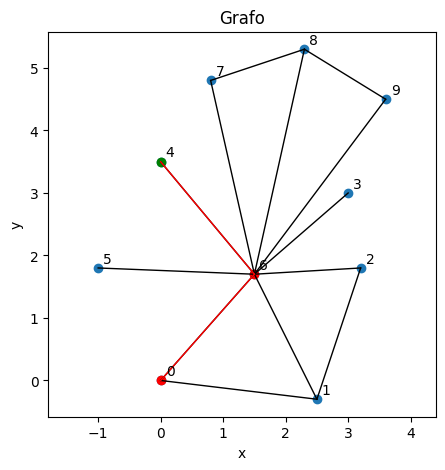

Probabilidade: 0.4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice # Para escolher um nó aleatório

################################################################################

# coordenadas dos nós
coords = np.array([
    [0.0, 0.0],    # nó 0
    [2.5, -0.3],   # nó 1
    [3.2, 1.8],    # nó 2
    [3.0, 3.0],    # nó 3
    [0.0, 3.5],    # nó 4
    [-1.0, 1.8],   # nó 5
    [1.5, 1.7],    # nó 6 (hub)
    [0.8, 4.8],    # nó 7
    [2.3, 5.3],    # nó 8
    [3.6, 4.5]     # nó 9
])

edges = [
 (6,0),(6,1),(6,2),(6,3),(6,4),(6,5),(6,7),(6,8),(6,9),
 (0,1),(1,2),(7,8),(8,9)
]

# Criar matriz de adjacência (NxN)
N = len(coords)
A = np.zeros((N, N))
for i,j in edges:
    A[i,j] = 1
    A[j,i] = 1 # A = A^T

# Partícula
N = len(coords) # N nós
M = 5 # M experimentos

################################################################################

# M iteracoes
experimentos_favoraveis = 0
for experimento in range(M):
  ultimo_no = ultimo_no_apos_caminho()
  #print(ultimo_no)
  if ultimo_no == N-1:
    experimentos_favoraveis += 1

print(f'Probabilidade: {experimentos_favoraveis/M}')

Questão 9 - Parte 1

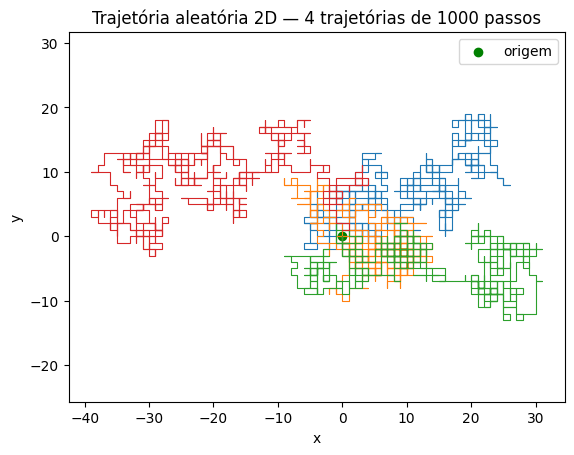

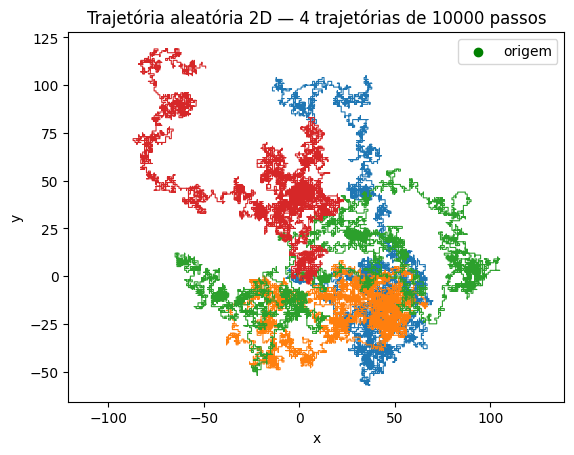

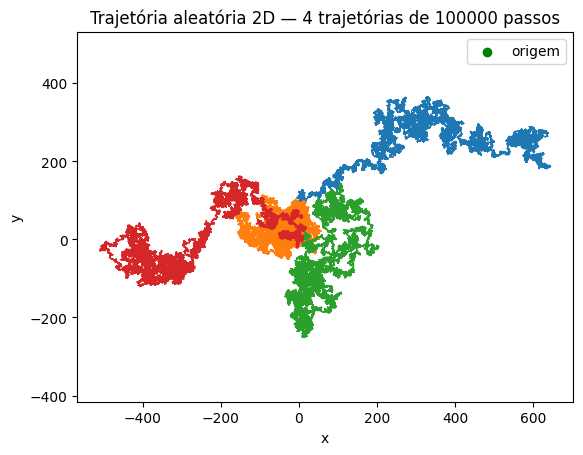

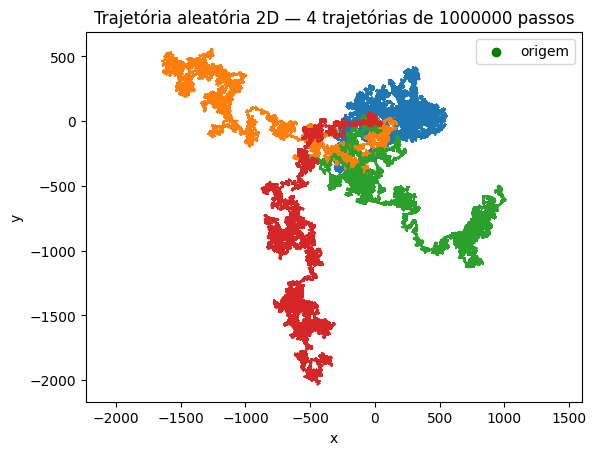

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros
delta = 1.0
M = 4

# retorna arrays de x e y
def random_walk_2d(N, delta):
    x = np.zeros(N)
    y = np.zeros(N)
    for i in range(N):
        d = np.random.randint(4)  # 0,1,2,3 igualmente prováveis
        if d == 0:      # direita
            x[i] = x[i-1] + delta
            y[i] = y[i-1]
        elif d == 1:    # esquerda
            x[i] = x[i-1] - delta
            y[i] = y[i-1]
        elif d == 2:    # cima
            x[i] = x[i-1]
            y[i] = y[i-1] + delta
        else:           # baixo (d == 3)
            x[i] = x[i-1]
            y[i] = y[i-1] - delta
    return x, y

# Gráfico
# plota M caminhadas para cada um dos N passos da lista do enunciado
for N in [10**3, 10**4, 10**5, 10**6]:
  plt.figure()
  for i in range(M):
    x, y = random_walk_2d(N, delta)
    plt.plot(x, y, linewidth=0.8)

  plt.scatter([0], [0], color='green', label='origem')
  plt.axis('equal')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Trajetória aleatória 2D — {M} trajetórias de {N} passos')
  plt.legend()
  plt.show()

Questão 9 - Parte 2

[1.0000000e+00 2.0420000e+00 3.0760000e+00 ... 1.0220244e+04 1.0225760e+04
 1.0228930e+04]
[1.0000000e+00 2.0128000e+00 2.9924000e+00 ... 9.9391840e+03 9.9390504e+03
 9.9404190e+03]


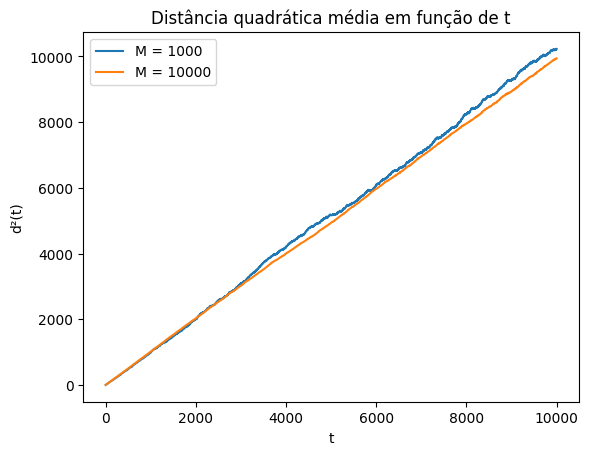

In [ ]:
# número de passos por realização
N = 10**4

def squared_distances_of_one_path(x, y): # distância quadrática para cada t de 1 caminho
  squared_distance = (x**2 + y**2)
  return squared_distance

def squared_distances_of_all_paths(M): # gera uma matriz com todos os vetores de todos os caminhos da função acima
  matriz = np.zeros((N, M)) # N linhas e M colunas
  for i in range(M):
    x,y = random_walk_2d(N, delta)
    matriz[:, i] = squared_distances_of_one_path(x, y) # preenche a linha i com d²(t) de 1 até N
  return matriz

def mean_squared_distances_of_all_paths(matriz): # calcula a média de cada coluna e coloca numa array
  return np.mean(matriz, axis=1)

matriz1 = squared_distances_of_all_paths(1000) # M = 1000

print(mean_squared_distances_of_all_paths(matriz1))

matriz2 = squared_distances_of_all_paths(10000) # M = 10000

print(mean_squared_distances_of_all_paths(matriz2))

plt.figure()
plt.plot(np.array(range(N)), mean_squared_distances_of_all_paths(matriz1), label='M = 1000')
plt.plot(np.array(range(N)), mean_squared_distances_of_all_paths(matriz2), label='M = 10000')
plt.xlabel('t')
plt.ylabel('d²(t)')
plt.title('Distância quadrática média em função de t')
plt.legend()
plt.show()

Questão 9 - Parte 3

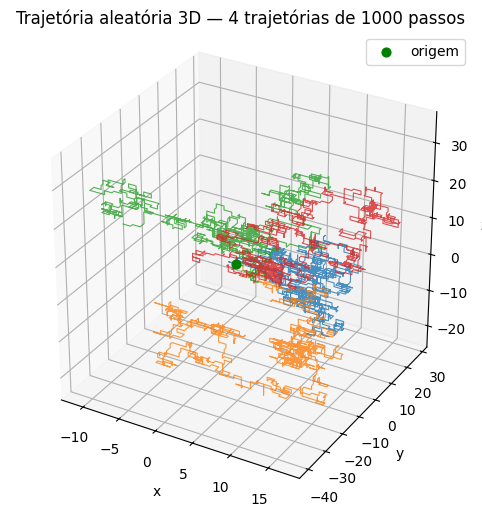

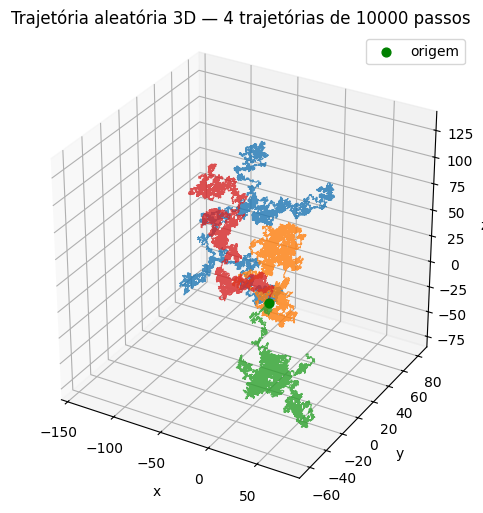

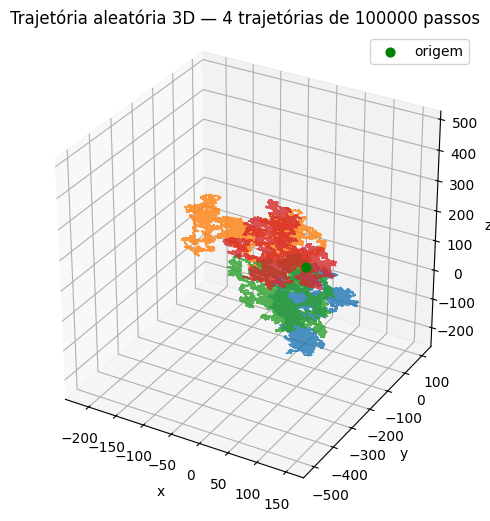

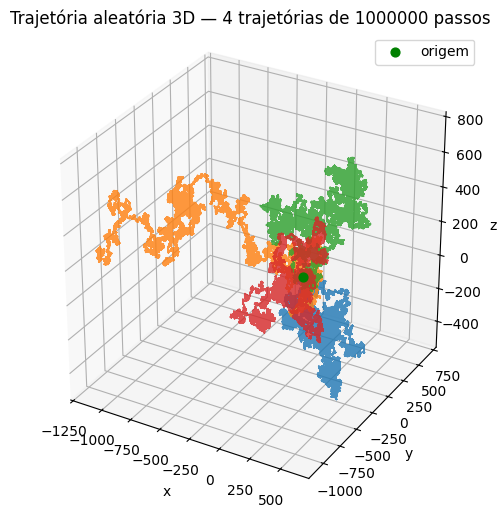

[0.000000e+00 1.000000e+00 2.072000e+00 ... 9.482272e+03 9.478634e+03
 9.484464e+03]


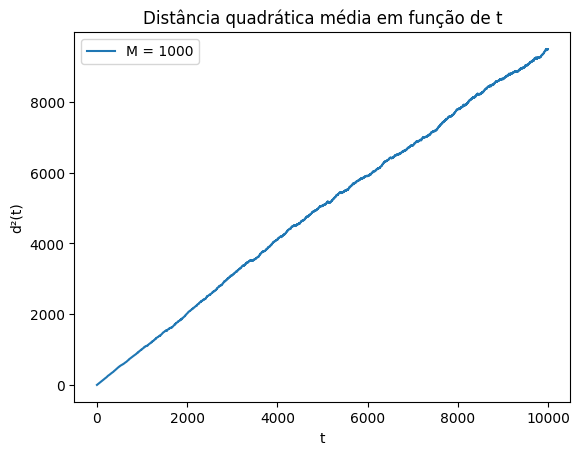

In [ ]:
# Versão 3D

import numpy as np
import matplotlib.pyplot as plt

# parâmetros
delta = 1.0
M = 4

# retorna arrays de x, y, z
def random_walk_3d(N, delta):
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    for i in range(1, N):
        d = np.random.randint(6)  # 0,1,2,3,4,5 igualmente prováveis
        if d == 0:      # direita
            x[i] = x[i-1] + delta
            y[i] = y[i-1]
            z[i] = z[i-1]
        elif d == 1:    # esquerda
            x[i] = x[i-1] - delta
            y[i] = y[i-1]
            z[i] = z[i-1]
        elif d == 2:    # cima
            x[i] = x[i-1]
            y[i] = y[i-1] + delta
            z[i] = z[i-1]
        elif d == 3:           # baixo (d == 3)
            x[i] = x[i-1]
            y[i] = y[i-1] - delta
            z[i] = z[i-1]
        elif d == 4:    # frente
            x[i] = x[i-1]
            y[i] = y[i-1]
            z[i] = z[i-1] + delta
        elif d == 5:    # trás
            x[i] = x[i-1]
            y[i] = y[i-1]
            z[i] = z[i-1] - delta
    return x, y, z

# Gráfico
# plota M caminhadas para cada um dos N passos da lista do enunciado
for N in [10**3, 10**4, 10**5, 10**6]:
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(M): # M caminhadas
        x, y, z = random_walk_3d(N, delta) # N passos
        ax.plot(x, y, z, linewidth=0.8, alpha=0.8)
    # origem
    ax.scatter([0], [0], [0], color='green', s=40, label='origem')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_box_aspect([1,1,1]) # Manter tamanho dos eixos iguais

    ax.set_title(f'Trajetória aleatória 3D — {M} trajetórias de {N} passos')
    ax.legend()
    plt.show()

# distância quadrática média

N = 10**4

def squared_distances_of_one_path(x, y, z): # distância quadrática para cada t de 1 caminho
  squared_distance = (x**2 + y**2 + z**2)
  return squared_distance

def squared_distances_of_all_paths(M): # gera uma matriz com todos os vetores de todos os caminhos da função acima
  matriz = np.zeros((N, M)) # N linhas e M colunas
  for i in range(M):
    x,y,z = random_walk_3d(N, delta)
    matriz[:, i] = squared_distances_of_one_path(x, y, z) # preenche a linha i com d²(t) de 1 até N
  return matriz

def mean_squared_distances_of_all_paths(matriz): # calcula a média de cada coluna e coloca numa array
  return np.mean(matriz, axis=1)

matriz1 = squared_distances_of_all_paths(1000) # M = 1000

print(mean_squared_distances_of_all_paths(matriz1))

#matriz2 = squared_distances_of_all_paths(10000) # M = 10000

#print(mean_squared_distances_of_all_paths(matriz2))

plt.figure()
plt.plot(np.array(range(N)), mean_squared_distances_of_all_paths(matriz1), label='M = 1000')
#plt.plot(np.array(range(N)), mean_squared_distances_of_all_paths(matriz2), label='M = 10000')
plt.xlabel('t')
plt.ylabel('d²(t)')
plt.title('Distância quadrática média em função de t')
plt.legend()
plt.show()